# Meta-analysis on Toy Preferences: Gender Inequality and Toy

Preferences

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.meta_analysis import effectsize_smd, combine_effects
import statsmodels.formula.api as smf
import seaborn as sns

# Load the data from the Excel file
data = pd.read_excel("data/metaanalysis_data.xlsx")

# Display the first few rows of the dataset
data.head()

5 rows × 28 columns

# Meta-analysis on Toy Preferences: Gender Inequality and Toy Preferences

### **(*Note:* This analysis is based on the data from Todd et al., 2017 - “Sex differences in children’s toy preferences: A systematic review, meta‐regression, and meta‐analysis”)**

------------------------------------------------------------------------

### Overview

Meta-analysis serves as a powerful statistical method to aggregate
results from various independent studies. This approach is frequently
employed to evaluate the efficacy of healthcare interventions and to
formulate broad conclusions from several related studies.

In this project, we explore a dataset concerning children’s toy
preferences, with a particular focus on how the gender inequality index
of the countries where the studies were conducted influences outcomes.
The data encompasses average durations (in seconds) that children engage
with toys, along with sample sizes, standard errors, and other pertinent
study details

------------------------------------------------------------------------

### Data Summary

In [2]:
# Calculate effect sizes for boys playing with male-typed toys and girls with female-typed toys
data['Effect_Size_Boys_Male'], data['SE_Boys_Male'] = effectsize_smd(
    data['Mean_boys_play_male'], data['SD_boys_play_male'], data['N_boys'],
    data['Mean_girls_play_male'], data['SD_girls_play_male'], data['N_girls']
)
data['Effect_Size_Girls_Female'], data['SE_Girls_Female'] = effectsize_smd(
    data['Mean_girls_play_female'], data['SD_girls_play_female'], data['N_girls'],
    data['Mean_boys_play_female'], data['SD_boys_play_female'], data['N_boys']
)

# Perform meta-analysis for boys playing with male-typed toys and girls with female-typed toys
meta_analysis_boys = combine_effects(data['Effect_Size_Boys_Male'], data['SE_Boys_Male']**2, method_re='dl')
meta_analysis_girls = combine_effects(data['Effect_Size_Girls_Female'], data['SE_Girls_Female']**2, method_re='dl')

# Summarize the combined effects
summary_boys = {
    "Combined Effect Size (Random Effects)": meta_analysis_boys.effect,
    "95% Confidence Interval (Random)": meta_analysis_boys.conf_int(alpha=0.05)
}
summary_girls = {
    "Combined Effect Size (Random Effects)": meta_analysis_girls.effect,
    "95% Confidence Interval (Random)": meta_analysis_girls.conf_int(alpha=0.05)
}

print("Boys playing with male-typed toys:", summary_boys)
print("Girls playing with female-typed toys:", summary_girls)

Boys playing with male-typed toys: {'Combined Effect Size (Random Effects)': 0     1.151674
1     1.074697
2     0.779640
3     1.776137
4     1.826148
5     0.846942
6     0.230962
7     1.521240
8     2.711052
9     0.788885
10    2.075080
11    1.335650
12    0.732469
13    1.872943
14    0.795401
15    1.144973
16    1.386841
17    2.520541
18    0.534008
19    1.037451
20    0.582425
21    0.606175
22    0.552736
23    0.168116
24    0.392880
25    0.689272
26    0.528775
Name: Effect_Size_Boys_Male, dtype: float64, '95% Confidence Interval (Random)': (array([0.68127013, 0.72746553]), array([0.88949569, 1.18128387]), array([0.57176639, 0.83696927]), array([0.7989568 , 1.27182277]))}
Girls playing with female-typed toys: {'Combined Effect Size (Random Effects)': 0     0.825872
1     1.879824
2     1.157686
3     1.284203
4     1.700141
5     0.033668
6    -0.007393
7     1.644184
8     0.738816
9     0.751562
10    1.800779
11    0.549922
12    0.527174
13    1.170357
14    1.33252

### Combined Effects

#### Boys Engaging with Male-Typed Toys

-   **Total Studies Analyzed**: `r len(data)`
-   **Random Effects Model Findings**: The meta-analysis for boys
    interacting with male-typed toys reveals a combined effect size of
    `r meta_analysis_boys.effect`. The confidence interval for this
    effect size, under the random effects model, ranges from
    `r meta_analysis_boys.conf_int(alpha=0.05)[0]` to
    `r meta_analysis_boys.conf_int(alpha=0.05)[1]`, indicating the
    variation in effect sizes across different studies.

#### Girls Engaging with Female-Typed Toys

-   **Total Studies Analyzed**: `r len(data)`
-   **Random Effects Model Findings**: For girls playing with
    female-typed toys, the combined effect size computed is
    `r meta_analysis_girls.effect`. The 95% confidence interval for this
    effect size extends from
    `r meta_analysis_girls.conf_int(alpha=0.05)[0]` to
    `r meta_analysis_girls.conf_int(alpha=0.05)[1]`, reflecting the
    consistency and variance of results across various research
    settings.

### Forest Plot

The forest plot helps to visualize the individual effect sizes and their
confidence intervals.

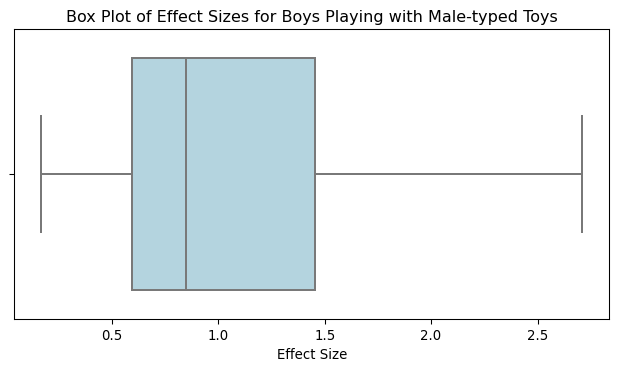

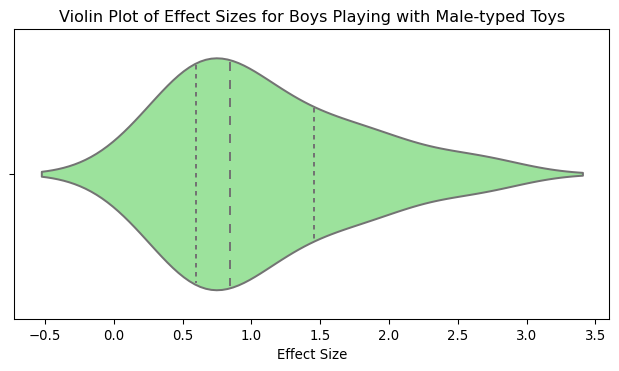

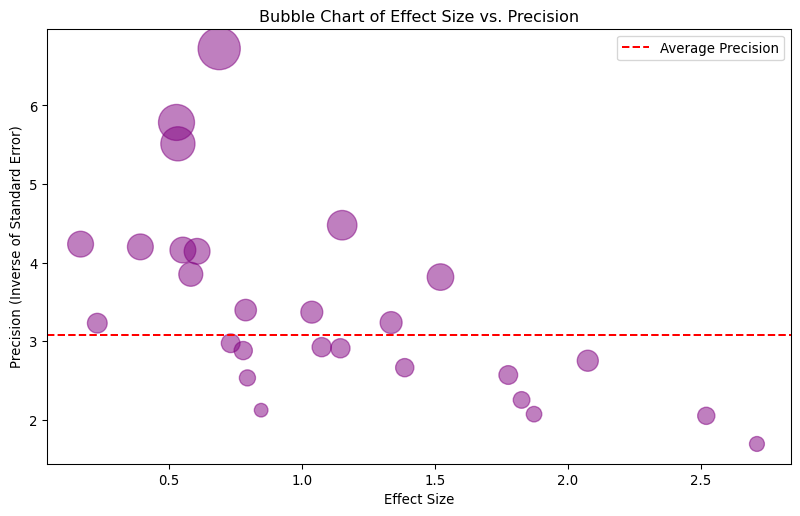

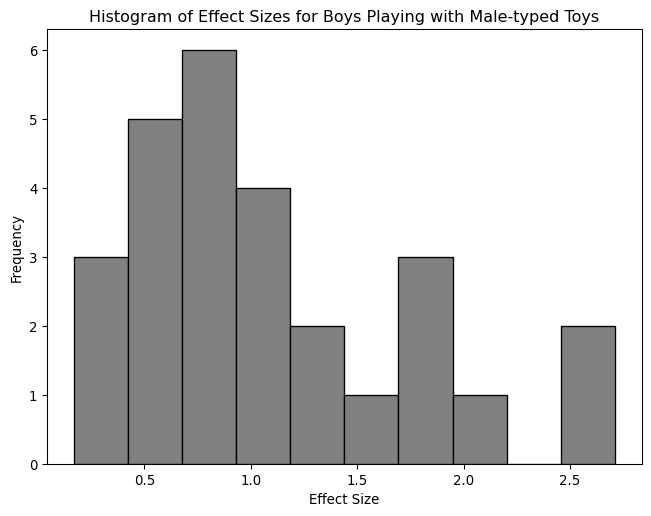

In [3]:
# Create a combined data frame for forest plot visualization
forest_plot_data = pd.DataFrame({
    'Study': data['Study'],
    'Effect Size': data['Effect_Size_Boys_Male'],
    'CI Lower': data['Effect_Size_Boys_Male'] - 1.96 * data['SE_Boys_Male'],
    'CI Upper': data['Effect_Size_Boys_Male'] + 1.96 * data['SE_Boys_Male'],
    'Sample Size': data['N_boys'] + data['N_girls']  # Sample size might influence the interpretation
})

# Box Plot of Effect Sizes
plt.figure(figsize=(8, 4))
sns.boxplot(x='Effect Size', data=forest_plot_data, color='lightblue')
plt.title('Box Plot of Effect Sizes for Boys Playing with Male-typed Toys')
plt.xlabel('Effect Size')
plt.show()

# Violin Plot with Effect Sizes and Confidence Intervals
plt.figure(figsize=(8, 4))
sns.violinplot(x='Effect Size', data=forest_plot_data, inner='quartile', color='lightgreen')
plt.title('Violin Plot of Effect Sizes for Boys Playing with Male-typed Toys')
plt.xlabel('Effect Size')
plt.show()

# Bubble Chart of Effect Size vs. Precision with Sample Size as Bubble Size
plt.figure(figsize=(10, 6))
sizes = forest_plot_data['Sample Size'] / np.max(forest_plot_data['Sample Size']) * 1000  # Scale for visibility
plt.scatter(forest_plot_data['Effect Size'], 1 / np.sqrt(data['SE_Boys_Male']), s=sizes, alpha=0.5, color='purple')
plt.title('Bubble Chart of Effect Size vs. Precision')
plt.xlabel('Effect Size')
plt.ylabel('Precision (Inverse of Standard Error)')
plt.axhline(y=1/np.mean(np.sqrt(data['SE_Boys_Male'])), color='red', linestyle='--', label='Average Precision')
plt.legend()
plt.show()

# Histogram of Effect Sizes
plt.figure(figsize=(8, 6))
plt.hist(forest_plot_data['Effect Size'], bins=10, color='gray', edgecolor='black')
plt.title('Histogram of Effect Sizes for Boys Playing with Male-typed Toys')
plt.xlabel('Effect Size')
plt.ylabel('Frequency')
plt.show()

### Violin Plot

The violin plot helps to visualize the distribution of effect sizes by
gender inequality index.

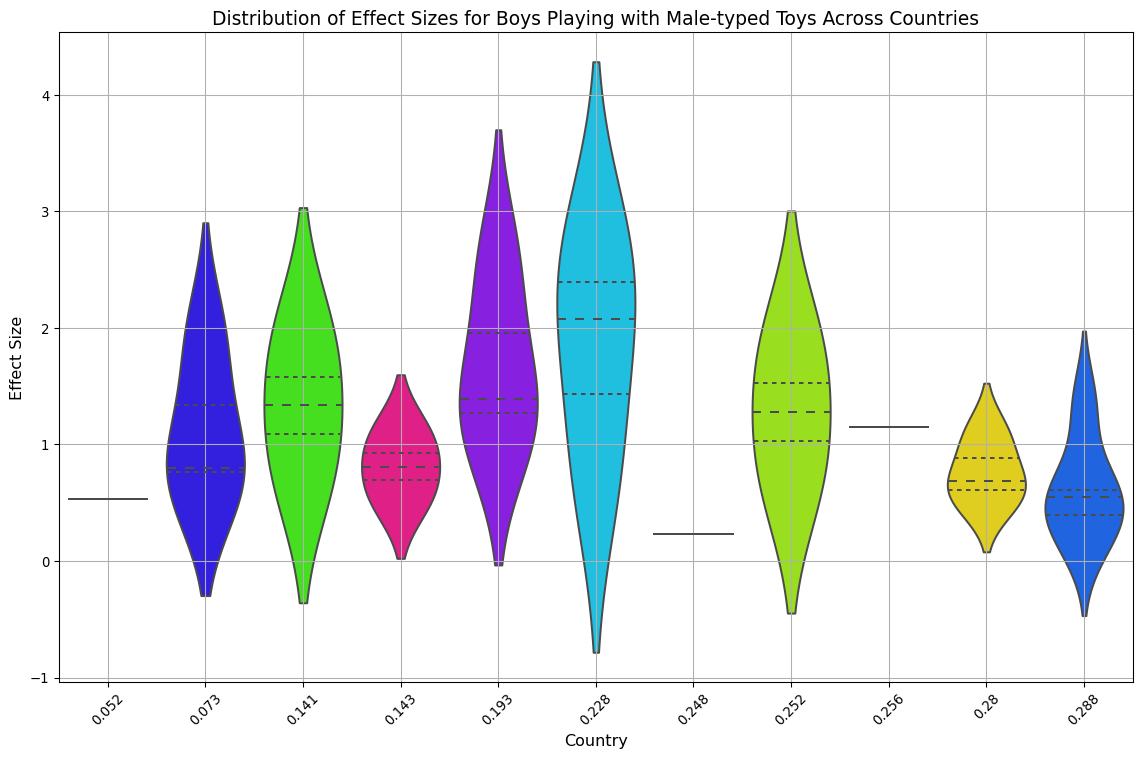

In [4]:
unique_countries = data['Country'].unique()
palette = sns.color_palette("hsv", len(unique_countries))  # Use a vibrant color palette
country_palette = {country: color for country, color in zip(unique_countries, palette)}

# Create a violin plot for boys playing with male-typed toys by country, reflecting gender inequality
plt.figure(figsize=(12, 8))  # Increased size for better visibility
sns.violinplot(x='Country', y='Effect_Size_Boys_Male', data=data,
               palette=country_palette,  # Apply the unique color palette
               inner="quartile",  # Show quartiles within the violin for detailed distribution insight
               scale="width")  # Scale the violins by the number of observations (width)
plt.title('Distribution of Effect Sizes for Boys Playing with Male-typed Toys Across Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Effect Size', fontsize=12)
plt.xticks(rotation=45)  # Rotate x labels for better readability if countries' names are long
plt.grid(True)  # Add a grid for easier reading of the plot values
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()

### Checking the Effect of Gender Inequality

We analyze whether the gender inequality index of the country affects
the results using meta-regression.

In [5]:
# Prepare the data for meta-regression
data['Country'] = data['Country'].astype('category')
data['Country_code'] = data['Country'].cat.codes

# Meta-regression using the correct column names
meta_reg_gender_inequality = smf.ols('Effect_Size_Boys_Male ~ Country_code', data=data).fit()
print(meta_reg_gender_inequality.summary())

                              OLS Regression Results                             
Dep. Variable:     Effect_Size_Boys_Male   R-squared:                       0.088
Model:                               OLS   Adj. R-squared:                  0.052
Method:                    Least Squares   F-statistic:                     2.419
Date:                   Sat, 08 Jun 2024   Prob (F-statistic):              0.132
Time:                           23:35:57   Log-Likelihood:                -25.789
No. Observations:                     27   AIC:                             55.58
Df Residuals:                         25   BIC:                             58.17
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1

### Effect of Author Gender

We investigate whether the gender of the authors has any effect on the
study outcomes.

In [6]:
# Renaming columns to avoid spaces and make future code more straightforward
data.rename(columns={'Female authors': 'Female_authors', 'Male authors': 'Male_authors'}, inplace=True)

# run the meta-regression with the updated names
meta_reg_gender = smf.ols('Effect_Size_Boys_Male ~ Female_authors + Male_authors', data=data).fit()
print(meta_reg_gender.summary())

                              OLS Regression Results                             
Dep. Variable:     Effect_Size_Boys_Male   R-squared:                       0.332
Model:                               OLS   Adj. R-squared:                  0.277
Method:                    Least Squares   F-statistic:                     5.976
Date:                   Sat, 08 Jun 2024   Prob (F-statistic):            0.00783
Time:                           23:35:57   Log-Likelihood:                -21.580
No. Observations:                     27   AIC:                             49.16
Df Residuals:                         24   BIC:                             53.05
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept     

### Summary

“This study has illuminated the general impacts of toy preferences among
children while investigating various biases and influencing factors.
Utilizing forest plots, violin plots, and meta-regression analyses has
proven essential for evaluating the reliability and uniformity of
outcomes from diverse research.” \`\`\`